# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn import metrics
from scipy.stats import ks_2samp

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,flag_doente
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


In [4]:
df.dtypes

age            float64
sex            float64
cp             float64
trestbps       float64
chol           float64
fbs            float64
restecg        float64
thalach        float64
exang          float64
oldpeak        float64
slope          float64
ca              object
thal            object
num              int64
flag_doente      int64
dtype: object

In [5]:
df.duplicated().sum()

0

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [6]:
def bivariada(df, explicativa, resposta) -> 'DataFrame':
    df_resp = pd.crosstab(df[explicativa],df[resposta], margins=True)
    df_resp['probabilidade'] = round((df_resp[1] / df_resp['All']),2)
    df_resp['chance'] = round((df_resp['probabilidade'] / (1 - df_resp['probabilidade'])),2)
    df_resp['rc'] = round((df_resp['chance']/df_resp.loc['All','chance']),2)
    df_resp['logito'] = round((np.log(df_resp['chance'])),2)
    df_resp['WOE'] = round((np.log(df_resp['rc'])),2)
    return df_resp

In [7]:
df1 = bivariada(df,'sex','flag_doente')
df1

flag_doente,0,1,All,probabilidade,chance,rc,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.26,0.35,0.41,-1.05,-0.89
1.0,92,114,206,0.55,1.22,1.44,0.20,0.36
All,164,139,303,0.46,0.85,1.00,-0.16,0.00


In [8]:
df2 = bivariada(df,'fbs','flag_doente')
df2

flag_doente,0,1,All,probabilidade,chance,rc,logito,WOE
fbs,,,,,,,,
0.0,141,117,258,0.45,0.82,0.96,-0.20,-0.04
1.0,23,22,45,0.49,0.96,1.13,-0.04,0.12
All,164,139,303,0.46,0.85,1.00,-0.16,0.00


In [9]:
df3 = bivariada(df,'exang','flag_doente')
df3

flag_doente,0,1,All,probabilidade,chance,rc,logito,WOE
exang,,,,,,,,
0.0,141,63,204,0.31,0.45,0.53,-0.80,-0.63
1.0,23,76,99,0.77,3.35,3.94,1.21,1.37
All,164,139,303,0.46,0.85,1.00,-0.16,0.00


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [10]:
def bivariada2(df, explicativa, resposta) -> 'DataFrame':
    df_resp = pd.crosstab(pd.qcut(df[explicativa],5,duplicates='drop'),df[resposta], margins=True)
    df_resp['probabilidade'] = round((df_resp[1] / df_resp['All']),2)
    df_resp['chance'] = round((df_resp['probabilidade'] / (1 - df_resp['probabilidade'])),2)
    df_resp['rc'] = round((df_resp['chance']/df_resp.loc['All','chance']),2)
    df_resp['logito'] = round((np.log(df_resp['chance'])),2)
    df_resp['WOE'] = round((np.log(df_resp['rc'])),2)
    return df_resp

In [11]:
bivariada2(df = df, resposta = 'flag_doente', explicativa = 'age')

flag_doente,0,1,All,probabilidade,chance,rc,logito,WOE
age,,,,,,,,
"(28.999, 45.0]",47,16,63,0.25,0.33,0.39,-1.11,-0.94
"(45.0, 53.0]",42,22,64,0.34,0.52,0.61,-0.65,-0.49
"(53.0, 58.0]",32,39,71,0.55,1.22,1.44,0.20,0.36
"(58.0, 62.0]",13,32,45,0.71,2.45,2.88,0.90,1.06
"(62.0, 77.0]",30,30,60,0.50,1.00,1.18,0.00,0.17
All,164,139,303,0.46,0.85,1.00,-0.16,0.00


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [12]:
reglog = smf.logit('flag_doente ~ C(sex) + C(cp) + trestbps + age', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


In [13]:
reglog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.3097
Time:                        19:43:32   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(sex)[T.1.0]     1.8094      0.353      5.130      0.000       1.118       2.501
C(cp)[T.2.0]     -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]      0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]      2.4789      0.553      4.485      0.000       1.396       3.562
trestbps          0.0193      0.009      2.261      0.024       0.003       0.036
age               0.0567      0.018      3.120      0.002       0.021       0.092
=================================================================================
"""

In [14]:
#De acordo com o P value,  o sexo[masculino] é a variável menos significativa, seguido pelo cp[T.2.0]

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [15]:
df['predito'] = reglog.predict(df)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.027278


In [17]:
cat_pred = pd.qcut(df['predito'],5,duplicates='drop').sort_index()

In [18]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count()
qualid

,flag_doente
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [19]:
qualid['predito'] = group_reg['predito'].mean()

In [20]:
qualid['doentes'] = group_reg['flag_doente'].mean()
qualid

,flag_doente,predito,doentes
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


Text(0.5, 0, 'Grupo')

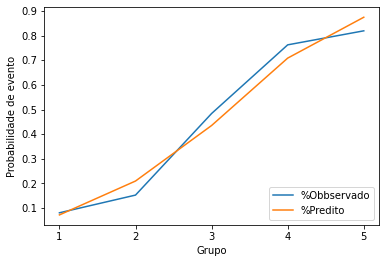

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['doentes'].plot(label='%Obbservado')
ax = qualid['predito'].plot(label='%Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [22]:
#acurácia
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)



#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], 
              df.loc[df['flag_doente'] != 1, 'predito']).statistic

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1

print(acc)
print(ks)
print(gini)

0.7953795379537953
0.5929549043691876
0.7038954202491665


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [23]:
reg_log2 = smf.logit('flag_doente ~ trestbps + thalach + thal + C(cp)', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.427926
         Iterations 6


In [24]:
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.3796
Time:                        19:43:34   Log-Likelihood:                -129.66
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 3.050e-30
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4391      1.718      0.256      0.798      -2.928       3.806
thal[T.6.0]      1.0932      0.627      1.743      0.081      -0.136       2.322
thal[T.7.0]      2.0430      0.331      6.164      0.000       1.393       2.693
thal[T.?]        0.7400      1.459      0.507      0.612      -2.119       3.599
C(cp)[T.2.0]    -0.0458      0.668     -0.069      0.945      -1.355       1.264
C(cp)[T.3.0]    -0.2499      0.600     -0.417      0.677      -1.426       0.926
C(cp)[T.4.0]     1.6577      0.568      2.919      0.004       0.544       2.771
trestbps         0.0166      0.009      1.913      0.056      -0.000       0.034
thalach         -0.0296      0.008     -3.852      0.000      -0.045      -0.015
================================================================================
"""

In [25]:
df['predito2'] =reg_log2.predict(df)

In [26]:
cat_pred2 = pd.qcut(df['predito2'],5,duplicates='drop').sort_index()
group_reg2 = df.groupby(cat_pred2)
qualid2 = group_reg2[['flag_doente']].count()
qualid2


,flag_doente
predito2,
"(0.027, 0.0884]",61
"(0.0884, 0.31]",60
"(0.31, 0.56]",61
"(0.56, 0.866]",60
"(0.866, 0.983]",61


In [27]:
qualid2['predito2'] = group_reg2['predito2'].mean()
qualid2['doentes'] = group_reg2['flag_doente'].mean()
qualid2

,flag_doente,predito2,doentes
predito2,,,
"(0.027, 0.0884]",61,0.063029,0.065574
"(0.0884, 0.31]",60,0.156809,0.183333
"(0.31, 0.56]",61,0.413571,0.360656
"(0.56, 0.866]",60,0.737571,0.733333
"(0.866, 0.983]",61,0.922370,0.950820


Text(0.5, 0, 'Grupo')

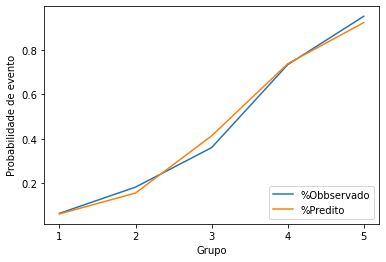

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid2['doentes'].plot(label='%Obbservado')
ax = qualid2['predito2'].plot(label='%Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

In [29]:
#acurácia
acc2 = metrics.accuracy_score(df['flag_doente'], df['predito2']>.5)



#KS
ks2 = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito2'], 
              df.loc[df['flag_doente'] != 1, 'predito2']).statistic

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito2'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini2 = 2*auc_ -1

print(acc2)
print(ks2)
print(gini2)

0.8217821782178217
0.6583172486401123
0.76776627478505
